In [36]:
import sys
sys.path.append('/home/iaw/MYscrip/WatAna')
import os

In [37]:
from util.traj_xyz import *
from util.auto_corr_fft import *
from util.auto_corr_to_Iw import *
from util.read_qv import *

In [38]:
def save_Ct(fp: str, tau: NDArray, Ct: NDArray) -> None:
    with open(fp, "w+") as F:
        for i, i_x in enumerate(tau):
            F.writelines("{:.6f}, {:.6f}\n".format(i_x, Ct[i]))
            
def save_Ir(fp: str, title: str, freq, Iw_s: List) -> None:
    with open(fp, "w+") as F:
        F.writelines(title)
        for f, intensities in zip(freq, Iw_s):
            parts = ["{:.6f}".format(f)] + ["{:.6f}".format(i) for i in intensities]
            line = ", ".join(parts) + "\n"
            F.write(line)

In [39]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [40]:
plt.rcParams["axes.labelweight"] ="bold" 
plt.rcParams["font.family"]="Times New Roman" 
plt.rcParams["font.weight"]="bold" 
plt.rcParams["font.size"]=14 
plt.rcParams["mathtext.default"]="regular"


def init_fig(ax):
    ax.spines['left'].set_position(('axes',0))
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.tick_params(which='major'          # 设置对主刻度和次刻度生效
                        ,bottom=True           # 底部坐标轴
                        ,left=True             # 左侧坐标轴
                        , right = True
                        , top = True
                        ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                        ,width=2               # 设置刻度线粗细
                        ,length=8              # 设置长短
                        ,labelsize=20
    
                        )
    ax.tick_params(which='minor'          # 设置对主刻度和次刻度生效
                        ,bottom=True           # 底部坐标轴
                        ,left=True             # 左侧坐标轴
                        , right = True
                        , top = True
                        ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                        ,width=2               # 设置刻度线粗细
                        ,length=5              # 设置长短
                        ,labelsize=20

                        )
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(250))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

    return ax


# 加载数据

## 实验数据

In [41]:
exp_data = np.loadtxt("./data/exp_h2o.csv", delimiter=",")

## PBE的数据

### 45ps

In [42]:
pbe_mulliken_50ps = pbe_mulliken_config(
      dt = 0.0005   # ps
    , vel_f= "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/all-vel.xyz"
    , mulliken_f = "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/pbe_64_50ps_zjb_mulliken.npy"
    , n_read = 100000 
    , qv_save = "./out/pbe_mulliken_50ps_qv.npy"
)
pbe_mulliken_50ps_Ct_save = "./out/pbe_mulliken_50ps_Ct.csv"
if not os.path.exists(pbe_mulliken_50ps.qv_save):
    qv_50ps_pbe_mulliken = qv_pbe_mulliken(pbe_mulliken_50ps)
else:
    qv_50ps_pbe_mulliken = np.load(pbe_mulliken_50ps.qv_save)
# autocorr
Ct_50ps_pbe_mulliken = auto_corr_fft(qv_50ps_pbe_mulliken, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_pbe_mulliken = np.array(list(range(Ct_50ps_pbe_mulliken.shape[0])), dtype=np.float64) * pbe_mulliken_50ps.dt
# save
save_Ct(pbe_mulliken_50ps_Ct_save, tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken)
# autocorr + hann
Ct_50ps_pbe_mulliken_hann = auto_corr_hann(Ct_50ps_pbe_mulliken)
# autocorr -> Ir
Iw_pbe_mulliken_50ps_hann = fft_to_Iw(tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken_hann)
Iw_pbe_mulliken_50ps_wohann = fft_to_Iw(tau_50ps_pbe_mulliken, Ct_50ps_pbe_mulliken)

In [73]:
q_s = np.load("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/pbe_64_50ps_zjb_mulliken.npy")

In [43]:
pbe_50ps = pbe_config(
      dt = 0.0005   # ps
    , xyz_f= "/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/50ps-pos.xyz"
    , n_read = 100000 
    , qv_save = "./out/pbe_50ps_qv.npy"
)
pbe_50ps_Ct_save = "./out/pbe_50ps_Ct.csv"
if not os.path.exists(pbe_50ps.qv_save):
    qv_50ps_pbe = qv_pbe(pbe_50ps)
else:
    qv_50ps_pbe = np.load(pbe_50ps.qv_save)
# autocorr
Ct_50ps_pbe = auto_corr_fft(qv_50ps_pbe, fraction_autocorrelation_function_to_fft = 0.1)
tau_50ps_pbe = np.array(list(range(Ct_50ps_pbe.shape[0])), dtype=np.float64) * pbe_50ps.dt
# save
save_Ct(pbe_50ps_Ct_save, tau_50ps_pbe, Ct_50ps_pbe)
# autocorr + hann
Ct_50ps_pbe_hann = auto_corr_hann(Ct_50ps_pbe)
# autocorr -> Ir
Iw_pbe_50ps_hann = fft_to_Iw(tau_50ps_pbe, Ct_50ps_pbe_hann)
Iw_pbe_50ps_wohann = fft_to_Iw(tau_50ps_pbe, Ct_50ps_pbe)

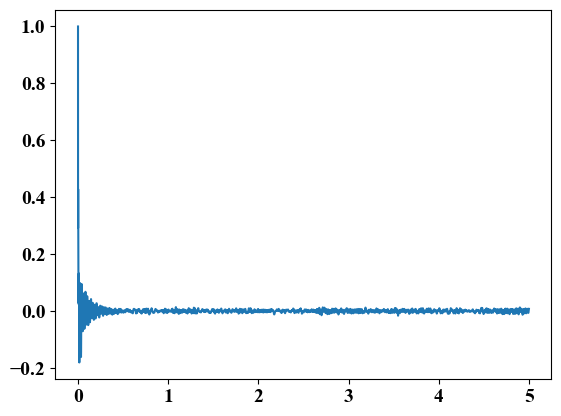

In [75]:
plt.plot(tau_50ps_pbe, Ct_50ps_pbe)

In [7]:
dipole_ljf = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/ljf/all-dipole.csv", delimiter=",")
dipole_ljf = np.gradient(dipole_ljf, 0.001, axis=0, edge_order=2) 
Ct_ljf_dipole = auto_corr_fft(dipole_ljf, fraction_autocorrelation_function_to_fft = 0.1)
tau_ljf_dipole = np.array(list(range(Ct_ljf_dipole.shape[0])), dtype=np.float64) * 0.001
Ct_ljf_dipole_hann = auto_corr_hann(Ct_ljf_dipole)
Iw_ljf_dipole_hann = fft_to_Iw(tau_ljf_dipole, Ct_ljf_dipole_hann)

# 高斯展宽
def gaussian_broadening(freq, spectrum, hwhm, max_freq=5000):
    # 初始化展宽后的光谱
    broadened_spectrum = np.zeros(max_freq + 1)
    gaussian =  lambda freq, center, hwhm: np.exp(-np.log(2.0) / hwhm**2 * (freq - center)**2)
    for i in range(len(freq)):
        center = int(freq[i])
        # 遍历高斯展宽范围
        for j in range(-3 * hwhm, 3 * hwhm + 1):
            current_freq = center + j
            if 0 <= current_freq <= max_freq:
                # 计算高斯函数值并累加到展宽光谱
                broadened_spectrum[current_freq] += spectrum[i] * gaussian(current_freq, center, hwhm)
    
    return broadened_spectrum

Iw_ljf_dipole_hann_g_broad = gaussian_broadening(Iw_ljf_dipole_hann[0], Iw_ljf_dipole_hann[1], 40)

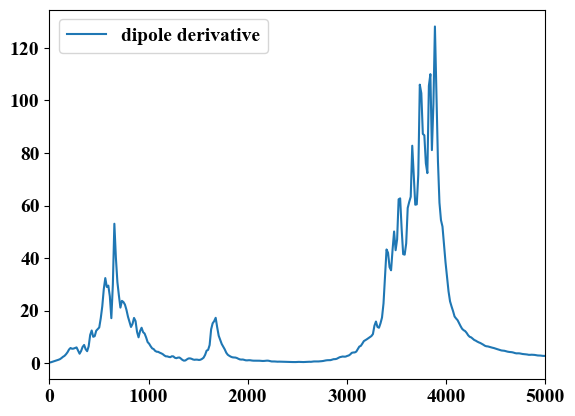

In [8]:
plt.plot(Iw_ljf_dipole_hann[0], Iw_ljf_dipole_hann[1], label = "dipole derivative")
plt.xlim([0, 5000])
#plt.ylim([0, 3])
plt.legend()

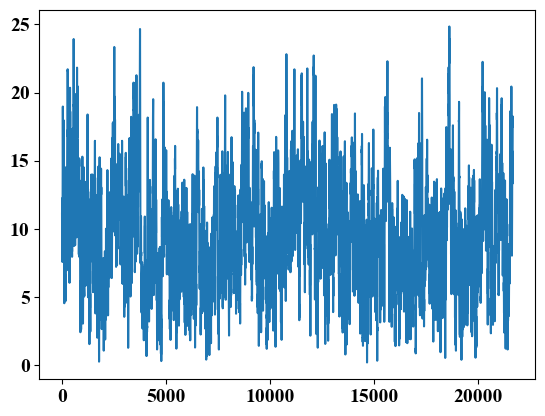

In [35]:
dipole_ljf = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/ljf/all-dipole.csv", delimiter=",")
plt.plot(list(range(np.linalg.norm(dipole_ljf, axis=1).shape[0])), np.linalg.norm(dipole_ljf, axis=1))

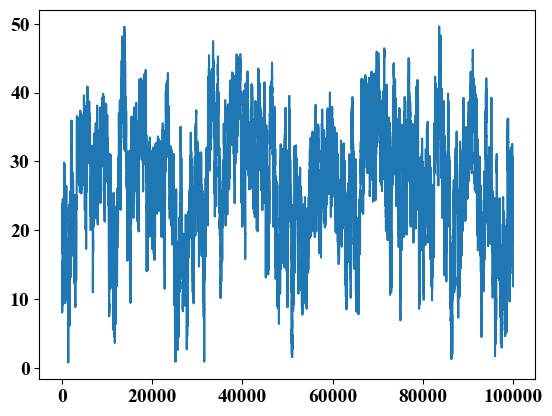

In [34]:
dipole_50ps_pbe = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/dipole/all-dipole.csv", delimiter=",")
dipole_50ps_pbe = dipole_50ps_pbe[:100000, :3]
plt.plot(list(range(np.linalg.norm(dipole_50ps_pbe, axis=1).shape[0])), np.linalg.norm(dipole_50ps_pbe, axis=1))

In [11]:
Iw_ljf_dipole_hann[0].shape, Iw_ljf_dipole_hann[1].shape

((1082,), (2165,))

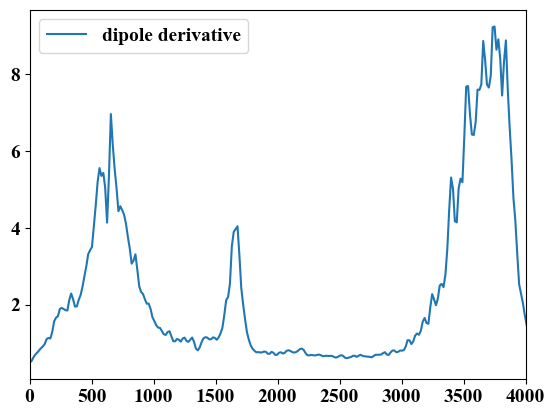

In [29]:
plt.plot(Iw_ljf_dipole_hann[0], Iw_ljf_dipole_hann[1], label = "dipole derivative")
plt.xlim([0, 4000])
plt.legend()

In [132]:
def func1():
    dipole_50ps_pbe = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/dipole/all-dipole.csv", delimiter=",")
    dipole_50ps_pbe = dipole_50ps_pbe[:100000, :3] * 3.33564e-30  # Debye -> C·m
    #dipole_50ps_pbe -= dipole_50ps_pbe.mean(axis=0)
    dipole_50ps_pbe = np.gradient(dipole_50ps_pbe, pbe_50ps.dt, axis=0, edge_order=2) 

    pbe_dipole_50ps_Ct_save = "./out/pbe_dipole_50ps_Ct.csv"

    # autocorr
    Ct_50ps_pbe_dipole = auto_corr_fft(dipole_50ps_pbe, fraction_autocorrelation_function_to_fft = 0.1)
    tau_50ps_pbe_dipole = np.array(list(range(Ct_50ps_pbe_dipole.shape[0])), dtype=np.float64) * pbe_50ps.dt
    # save
    save_Ct(pbe_dipole_50ps_Ct_save, tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole)
    # autocorr + hann
    Ct_50ps_pbe_dipole_hann = auto_corr_hann(Ct_50ps_pbe_dipole)
    # autocorr -> Ir
    Iw_pbe_dipole_50ps_hann = fft_to_Iw(tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole_hann)
    Iw_pbe_dipole_50ps_wohann = fft_to_Iw(tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole)

    return Iw_pbe_dipole_50ps_hann, Iw_pbe_dipole_50ps_wohann, tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole_hann

def func2():
    dipole_50ps_pbe = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/dipole/all-dipole.csv", delimiter=",")
    dipole_50ps_pbe = dipole_50ps_pbe[:100000, :3] * 3.33564e-30 # Debye -> C·m
    #dipole_50ps_pbe -= dipole_50ps_pbe.mean(axis=0)
    pbe_dipole_50ps_Ct_save = "./out/pbe_dipole_50ps_Ct_2.csv"

    # autocorr
    Ct_50ps_pbe_dipole = auto_corr_fft(dipole_50ps_pbe, fraction_autocorrelation_function_to_fft = 0.1)
    tau_50ps_pbe_dipole = np.array(list(range(Ct_50ps_pbe_dipole.shape[0])), dtype=np.float64) * pbe_50ps.dt
    # save
    save_Ct(pbe_dipole_50ps_Ct_save, tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole)
    # autocorr + hann
    Ct_50ps_pbe_dipole_hann = auto_corr_hann(Ct_50ps_pbe_dipole)
    # autocorr -> Ir
    Iw_pbe_dipole_50ps_hann = fft_to_Iw(tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole_hann)
    Iw_pbe_dipole_50ps_wohann = fft_to_Iw(tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole)

    return Iw_pbe_dipole_50ps_hann, Iw_pbe_dipole_50ps_wohann, tau_50ps_pbe_dipole, Ct_50ps_pbe_dipole_hann
  

In [152]:
dipole_50ps_pbe = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/dipole/all-dipole.csv", delimiter=",")
dipole_50ps_pbe = dipole_50ps_pbe[:100000, :3]
dipole_50ps_pbe2 = np.gradient(dipole_50ps_pbe, pbe_50ps.dt, axis=0, edge_order=2) 

In [160]:
qv_50ps_pbe

array([[ 1.38898123e+02,  7.58872516e+01,  4.00235528e+02],
       [-7.29886046e+01,  3.74700992e+01,  3.97764583e+02],
       [-2.67283566e+02, -1.66017538e+01,  3.76648329e+02],
       ...,
       [-4.60874991e+02,  5.75873770e+01,  3.95513868e+01],
       [-5.23681527e+04, -2.78488142e+04, -2.60612956e+04],
       [ 9.07510341e+04,  3.49773990e+04,  2.56253347e+04]])

In [161]:
dipole_50ps_pbe2

array([[  753.39338,   218.94388,   854.28611],
       [  -27.9547 ,   154.5588 ,   891.29409],
       [ -780.5334 ,    69.87673,   902.36944],
       ...,
       [-1388.86022,  -287.26186,  -340.58383],
       [-1388.86548,  -136.39552,    30.05848],
       [-1340.18456,    35.09496,   402.18244]])

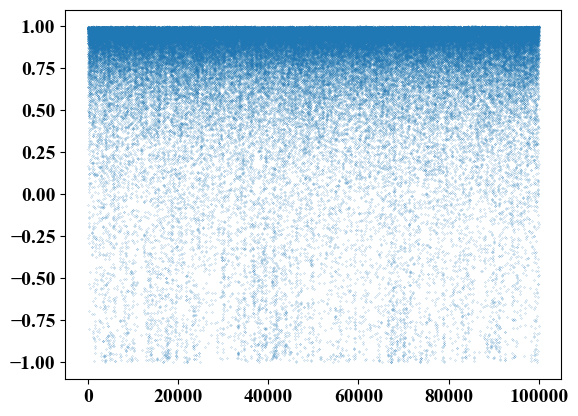

In [169]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y) + 1e-10)

sim = np.zeros(shape = (qv_50ps_pbe.shape[0]))
for i in range(qv_50ps_pbe.shape[0]):
    x1 = qv_50ps_pbe[i, :]
    x2 = dipole_50ps_pbe2[i, :]
    sim[i] = np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2) + 1e-10)

plt.scatter(list(range(sim.shape[0])), sim, s = 0.02)


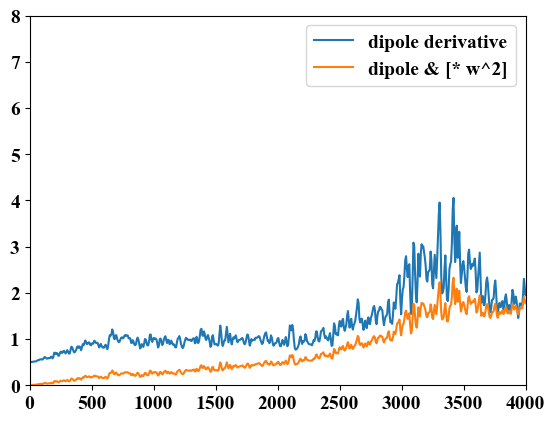

In [133]:
Iw_pbe_dipole_50ps_hann1, Iw_pbe_dipole_50ps_wohann1,tau_50ps_pbe_dipole1, Ct_50ps_pbe_dipole_hann1  = func1()
Iw_pbe_dipole_50ps_hann2, Iw_pbe_dipole_50ps_wohann2,tau_50ps_pbe_dipole2, Ct_50ps_pbe_dipole_hann2  = func2()

plt.plot(Iw_pbe_dipole_50ps_hann1[0], Iw_pbe_dipole_50ps_hann1[1], label = "dipole derivative")
plt.plot(Iw_pbe_dipole_50ps_hann2[0], Iw_pbe_dipole_50ps_hann2[1]*(Iw_pbe_dipole_50ps_hann2[0]**2) / 1e07*1.5,  label = "dipole & [* w^2]")
plt.xlim([0, 4000])
plt.ylim([0, 8]) 
plt.legend()

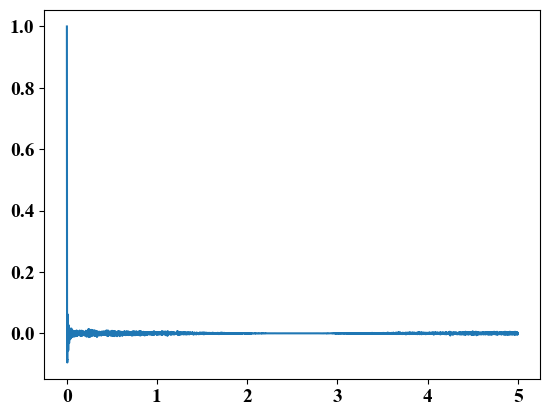

In [175]:
plt.plot(tau_50ps_pbe_dipole1, Ct_50ps_pbe_dipole_hann1)

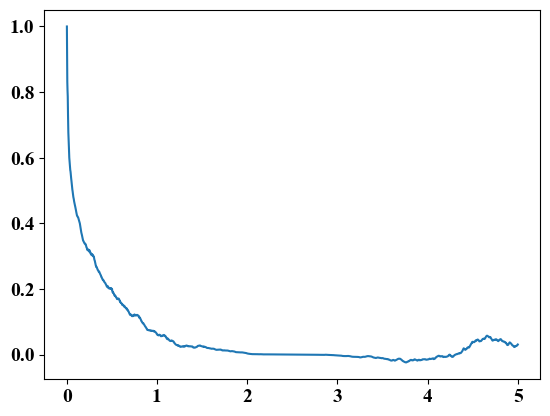

In [174]:
plt.plot(tau_50ps_pbe_dipole2, Ct_50ps_pbe_dipole_hann2)

In [139]:
dipole_total = np.loadtxt("/home/iaw/DATA/wat_md/bulk_pbe/64_zjb/dipole/all-dipole.csv", delimiter=",")

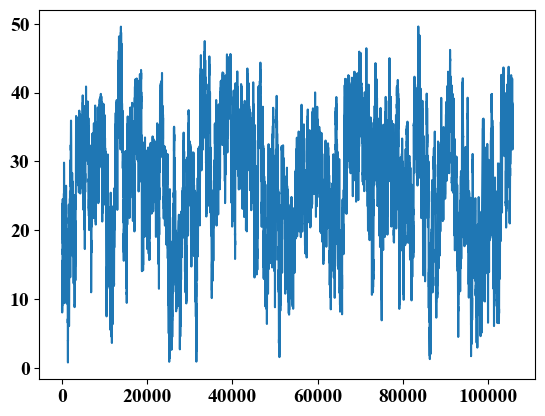

In [140]:
dipole_total = dipole_total[:, -1]
plt.plot(list(range(dipole_total.shape[0])), dipole_total)

In [44]:

exp_data_y_norm = (exp_data[:, 1] -exp_data[:, 1].min())/(exp_data[:, 1].max() - exp_data[:, 1].min())
Iw_pbe_mulliken_50ps_hann_norm = (Iw_pbe_mulliken_50ps_hann[1] -Iw_pbe_mulliken_50ps_hann[1].min())/(30- Iw_pbe_mulliken_50ps_hann[1].min())
Iw_pbe_mulliken_50ps_wohann_norm = (Iw_pbe_mulliken_50ps_wohann[1] -Iw_pbe_mulliken_50ps_wohann[1].min())/(30- Iw_pbe_mulliken_50ps_wohann[1].min())

Iw_pbe_50ps_hann_norm = (Iw_pbe_50ps_hann[1] -Iw_pbe_50ps_hann[1].min())/(20- Iw_pbe_50ps_hann[1].min())
Iw_pbe_50ps_wohann_norm = (Iw_pbe_50ps_wohann[1] -Iw_pbe_50ps_wohann[1].min())/(20- Iw_pbe_50ps_wohann[1].min())

Iw_pbe_dipole_50ps_hann_norm = (Iw_pbe_dipole_50ps_hann1[1] -Iw_pbe_dipole_50ps_hann1[1].min())/(5- Iw_pbe_dipole_50ps_hann1[1].min())
Iw_pbe_dipole_50ps_wohann_norm = (Iw_pbe_dipole_50ps_wohann1[1] -Iw_pbe_dipole_50ps_wohann1[1].min())/(5- Iw_pbe_dipole_50ps_wohann1[1].min())

fig = plt.figure(figsize=(9,7),dpi=300)
ax1= plt.gca()
ax1 = init_fig(ax1)

ax1.plot(exp_data[:, 0], exp_data_y_norm, label = "exp", c = "black")

ax1.plot(Iw_pbe_mulliken_50ps_hann[0], Iw_pbe_mulliken_50ps_hann_norm, label = "mulliken hann", alpha = 0.9)
#plt.plot(Iw_pbe_mulliken_50ps_wohann[0], Iw_pbe_mulliken_50ps_wohann_norm, label = "mulliken wo hann", alpha = 0.5)

ax1.plot(Iw_pbe_50ps_hann[0], Iw_pbe_50ps_hann_norm, label = "fix hann", alpha = 0.9)
#plt.plot(Iw_pbe_50ps_hann[0], Iw_pbe_50ps_wohann_norm, label = "fix wo hann", alpha = 0.5)

ax1.plot(Iw_pbe_dipole_50ps_hann1[0], Iw_pbe_dipole_50ps_hann_norm, label = "dipole hann", alpha = 0.9)

plt.xlim([0, 4000])
plt.legend(frameon=False, ncol=1)
plt.show()

NameError: name 'Iw_pbe_dipole_50ps_hann1' is not defined